<a href="https://colab.research.google.com/github/SachinSharma6174/neural_network/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from scipy.sparse.construct import random
from numpy.core.fromnumeric import size
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

## 1. Load sample dataset
# path_to_file = tf.keras.utils.get_file("nietzsche.txt", 
#                   origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")

# vocabulary_size = 5000
# vocabulary_size = 4000
vocab_volume = 4000

(X_train, y_train),  (X_test, y_test) = imdb.load_data(num_words = vocab_volume)
#  70-30 split
train_size = 0.7

x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

x_train, x_test, y_train, y_test  = train_test_split(x,y,train_size = train_size, random_state = 5999)

print(' training samples, {}'.format(len(x_train) ) )

print(' test samples {} '.format(len(x_test)))
print(' y train samples {} '.format(len(y_train)))
print(' y test samples {} '.format(len(y_test)))


 training samples, 35000
 test samples 15000 
 y train samples 35000 
 y test samples 15000 


In [91]:
#7. Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def displayConfusionMatrix(y_test , y_predicted, title):
  mat = confusion_matrix(y_test, y_predicted)
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Label")
  plt.title(title)

In [7]:
import keras


# Reference KERAS documentation

# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data()
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])


1654784/1641221 [==============================] - 0s 0us/step


In [38]:
import keras.preprocessing 
from keras.preprocessing import sequence
max_review_words = 650
X_test_pad = sequence.pad_sequences(x_test, maxlen = max_review_words)
X_train_pad = sequence.pad_sequences(x_train, maxlen = max_review_words)



In [39]:
print(' training samples, {}'.format(len(X_train_pad) ) )
print(' test samples {} '.format(len(X_test_pad)))
print(' y train samples {} '.format(len(y_train)))
print(' y test samples {} '.format(len(y_test)))


 training samples, 35000
 test samples 15000 
 y train samples 35000 
 y test samples 15000 


In [74]:
from keras.layers.recurrent_v2 import GRU
from keras.layers.recurrent import SimpleRNN

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32

model_LSTM=Sequential()
# Embedding needs to be added for part 2
model_LSTM.add(Embedding(vocab_volume, embedding_size, input_length=max_review_words))
#  Dimensionality of the output space  -  2
## LSTM
model_LSTM.add(LSTM(100))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam')


## SIMPLE RNN
model_RNN=Sequential()
model_RNN.add(Embedding(vocab_volume, embedding_size, input_length=max_review_words))
model_RNN.add(SimpleRNN(100))
model_RNN.add(Dropout(0.2))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.compile(loss='binary_crossentropy', optimizer='adam')


## GRU
model_GRU=Sequential()
model_GRU.add(Embedding(vocab_volume, embedding_size, input_length=max_review_words))
model_GRU.add(GRU(100))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer='adam')


## LSTM MODEL FIT

In [82]:
batch_size = 64
number_of_epochs = 4

X_valid, y_valid = X_train_pad[:64], y_train[:64]
X_train2, y_train2 = X_train_pad[64:5000], y_train[64:5000]


model_LSTM.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), epochs=number_of_epochs, batch_size=batch_size )

Epoch 1/4
78/78 [==============================] - 11s 106ms/step - loss: 0.6695 - val_loss: 0.5508
Epoch 2/4
78/78 [==============================] - 8s 97ms/step - loss: 0.4311 - val_loss: 0.5274
Epoch 3/4
78/78 [==============================] - 8s 97ms/step - loss: 0.2813 - val_loss: 0.5173
Epoch 4/4
78/78 [==============================] - 7s 96ms/step - loss: 0.2070 - val_loss: 0.5384


In [83]:
model_LSTM.save('saved_model/model-v2') 

INFO:tensorflow:Assets written to: saved_model/model-v2/assets


INFO:tensorflow:Assets written to: saved_model/model-v2/assets


In [84]:
scores = model_LSTM.evaluate(X_test_pad, y_test, verbose=0)
print('Test accuracy:', scores)

Test accuracy: 0.4129481911659241


In [86]:
from sklearn import metrics

y_predicted = model_LSTM.predict(X_test_pad)
print(metrics.classification_report(y_test,np.round(y_predicted)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7627
           1       0.81      0.84      0.83      7373

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



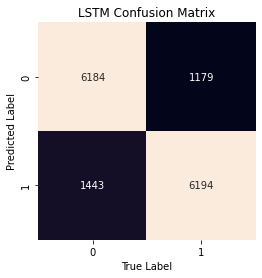

In [93]:
displayConfusionMatrix(y_test=y_test , y_predicted= np.round(y_predicted) , title = "LSTM Confusion Matrix")

In [69]:
# set(y_predicted.reshape(15000))
from collections import Counter
set(y_test.reshape(15000)), Counter(y_test)

({0, 1}, Counter({0: 7627, 1: 7373}))

# SIMPLE RNN MODEL FIT



In [87]:
batch_size = 64
number_of_epochs = 4

model_RNN.fit(X_train2,
               y_train2,
               validation_data=(X_valid, y_valid),
               epochs=number_of_epochs,
               batch_size=batch_size )


Epoch 1/4
78/78 [==============================] - 81s 1s/step - loss: 0.7111 - val_loss: 0.6951
Epoch 2/4
78/78 [==============================] - 82s 1s/step - loss: 0.7037 - val_loss: 0.6811
Epoch 3/4
78/78 [==============================] - 95s 1s/step - loss: 0.6895 - val_loss: 0.6661
Epoch 4/4
78/78 [==============================] - 86s 1s/step - loss: 0.6524 - val_loss: 0.6329


In [58]:
model_RNN.save('saved_model/model-rnn')

INFO:tensorflow:Assets written to: saved_model/model-rnn/assets


INFO:tensorflow:Assets written to: saved_model/model-rnn/assets


In [59]:
scores = model_RNN.evaluate(X_test_pad, y_test, verbose=1)
print('Test accuracy:', scores)

469/469 [==============================] - 32s 67ms/step - loss: 0.6197
Test accuracy: 0.6196576356887817


In [94]:
from sklearn import metrics

y_predicted_RNN = model_RNN.predict(X_test_pad)
print(metrics.classification_report(y_test,np.round(y_predicted)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7627
           1       0.81      0.84      0.83      7373

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



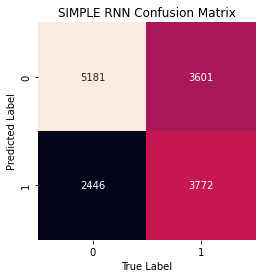

In [96]:
displayConfusionMatrix(y_test=y_test , y_predicted= np.round(y_predicted_RNN) , title = "SIMPLE RNN Confusion Matrix")

## **GRU MODEL FIT**

In [75]:
X_valid_2, y_valid_2 = X_train_pad[:64], y_train[:64]
X_train3, y_train3 = X_train_pad[64:5000], y_train[64:5000]


model_GRU.fit(X_train3,
              y_train3,
              validation_data=(X_valid_2, y_valid_2),
              epochs=number_of_epochs,
              batch_size=batch_size )

Epoch 1/4
78/78 [==============================] - 12s 105ms/step - loss: 0.6713 - val_loss: 0.6447
Epoch 2/4
78/78 [==============================] - 7s 95ms/step - loss: 0.5595 - val_loss: 0.5423
Epoch 3/4
78/78 [==============================] - 7s 95ms/step - loss: 0.3592 - val_loss: 0.5453
Epoch 4/4
78/78 [==============================] - 7s 96ms/step - loss: 0.2335 - val_loss: 0.6141


In [76]:
model_GRU.save('saved_model/model-gru') 

INFO:tensorflow:Assets written to: saved_model/model-gru/assets


INFO:tensorflow:Assets written to: saved_model/model-gru/assets


In [77]:
scores = model_GRU.evaluate(X_test_pad, y_test, verbose=0)
print('Test accuracy:', scores)

Test accuracy: 0.457518607378006


In [99]:
from sklearn import metrics

y_predicted_GRU = model_RNN.predict(X_test_pad)
print(metrics.classification_report(y_test, np.round(y_predicted_GRU)))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      7627
           1       0.61      0.51      0.56      7373

    accuracy                           0.60     15000
   macro avg       0.60      0.60      0.59     15000
weighted avg       0.60      0.60      0.59     15000



In [100]:
# print(y_predicted)
print(metrics.classification_report(y_test, np.round(y_predicted_GRU)))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63      7627
           1       0.61      0.51      0.56      7373

    accuracy                           0.60     15000
   macro avg       0.60      0.60      0.59     15000
weighted avg       0.60      0.60      0.59     15000



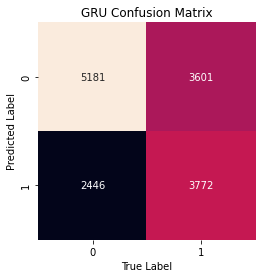

In [101]:
displayConfusionMatrix(y_test=y_test , y_predicted= np.round(y_predicted_GRU) , title = "GRU Confusion Matrix")

## X_TEST split - short, medium, and long inputs

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,train_size = train_size, random_state = 5999)


print(' training samples, {}'.format(len(x_train) ) )
print(' test samples {} '.format(len(x_test)))
print(' y train samples {} '.format(len(y_train)))
print(' y test samples {} '.format(len(y_test)))


In [ ]:
x_test_sorted = sorted()

## Embeddings in the pretrained model (GLOVE) 

In [ ]:
import os
from keras.layers import Embedding
from keras.initializers import Constant

path_to_glove_file = "glove.6B.100d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

num_tokens = len(word_index)
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix for our word list
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

model_simple_rnn = Sequential()
model_simple_rnn.add(Embedding(num_tokens,
                               embedding_dim,
                               embeddings_initializer=Constant(embedding_matrix), 
                               trainable=False)
                    )
model_simple_rnn.add(SimpleRNN(embedding_dim))
model_simple_rnn.add(Dropout(0.2))
model_simple_rnn.add(Dense(1, activation='sigmoid'))
model_simple_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ["accuracy"])